# Referensi yang Mungkin Berguna
1. Tutorial pandas dan membuat grafik https://www.youtube.com/watch?v=dcqPhpY7tWk 
2. Tutorial pandas juga tapi tertulis https://www.geeksforgeeks.org/pandas-tutorial/ 

# Baca data dari file .csv
1. Unduh loan_sanction_train.csv dari https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval 
2. Gunakan pandas untuk membaca file tersebut
3. Print dataframe yang telah dibaca

# Filter dan sort
1. Tampilkan data loan oleh seorang laki-laki!
2. Urutkan data berdasar jumlah pinjaman!
(cukup tampilkan hasil akhir dari dua perintah di atas)

# Aggregating
1. Hitung rata-rata pendapatan dari peminjam!
2. Gender apa yang paling banyak mengajukan pinjaman, laki-laki atau perempuan?
3. Hitung rata-rata pinjaman yang diajukan untuk masing-masing area properti! 

# Membuat Grafik
1. Buatlah histogram untuk penghasilan peminjam, beri judul grafik, dan label untuk tiap sumbu yang jelas!
2. Buatlah pie chart untuk tingkat pendidikan para peminjam!

In [ ]:
# IMPORT MODULE YANG DIBUTUHKAN
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [ ]:
# BACA FILE CSV DAN SIMPAN DI VARIABEL (data)
data = pd.read_csv("loan_sanction_train.csv")

# TAMPILKAN ISI DARI VARIABEL (data)
print(data)

In [ ]:
# FILTER DAN SORT NO. 1
# FILTER DATA BERDASARKAN GENDER 

option_gender = ["TOTAL", "Male", "Female"]
def preview_gender(Gender):
    if Gender == "TOTAL":
        male = len(data.loc[data["Gender"] == "Male"])
        female = len(data.loc[data["Gender"] == "Female"])
        total = male + female
        label = [f"Male - {male} - {round(male/total*100, 1)}%", f"Female - {female} - {round(female/total*100, 1)}%"]
        plt.title("DATA OF LOAN TAKERS - DIVIDED BY GENDER")
        plt.pie([male, female], labels = label)
        plt.show()
    else:
        new_df = data.loc[data["Gender"] == Gender]
        txt = f"DATA OF ({Gender}) LOAN TAKERS\n"
        for i in new_df.columns.to_list():
            if (i == "ApplicantIncome") or (i == "CoapplicantIncome"):
                txt += f"{i} (Rounded to the nearest hundreth) : \n"
                rounded = dict()
                for item in new_df[i].to_list():
                    item = round(item/100)*100
                    if item in rounded:
                        rounded[item] += 1
                    else:
                        rounded[item] = 1
                key_list = list(rounded.keys()) ; key_list.sort()
                for i in key_list:
                    txt += f"{i} - {rounded[i]}\n"
            elif (i != "Loan_ID") and (i != "Gender"):
                txt += f"{i} : \n"
                x = new_df[i].value_counts().to_dict()
                key_list = list(x.keys()) ; key_list.sort()
                for i in key_list:
                    txt += f"{i} - {x[i]}\n"
            txt += "\n"
        plt.text(0, 0, txt)
        plt.axis("off")
        plt.show()
ipywidgets.interact(preview_gender, Gender = option_gender)



In [ ]:
# FILTER DAN SORT NO. 2
# DATA DIURUTKAN BERDASARKAN COLUMN YANG DIPILIH
option = data.columns.to_list()
def sort_data(Value):
    print(data.sort_values(by = Value))
ipywidgets.interact(sort_data, Value = option)

In [ ]:
# AGGREGATING NO. 1
# MENGHITUNG RATA RATA PENDAPATAN DARI MASING MASING JENIS KOLOM 
option = data.columns.to_list() ; option.remove("ApplicantIncome") ; option.remove("CoapplicantIncome"); option.remove("Loan_ID"); option.remove("LoanAmount")
def average_income(Value):
    txt = f"AVERAGE INCOME BASED ON ({Value}) COLUMN VALUE : \n"
    x = list(data[Value].unique())
    for i in x:
        if not (i == i):
            continue
        avg_df = data.loc[data[Value] == i]
        avg = avg_df["ApplicantIncome"].mean()
        txt += f"{i} - {round(avg, 2)}\n"
    print(txt)
ipywidgets.interact(average_income, Value = option)
    

In [ ]:
# AGGREGATING NO. 2
# FUNCTION UNTUK MENENTUKAN GENDER TERBANYAK DARI SEBUAH DATAFRAME YANG MEMILIKI KOLOM (Gender)
def check_gender():
    male = len(data.loc[data["Gender"] == "Male"])
    female = len(data.loc[data["Gender"] == "Female"])
    if male > female:
        return f"Male - {male}"
    elif male < female:
        return f"Female - {female}"
    else:
        return "Equal"

print(check_gender())


In [ ]:
# AGGREGATING NO. 3
# MENGHITUNG RATA RATA PINJAMAN YANG DIAJUKAN DARI MASING MASING JENIS KOLOM 
option = data.columns.to_list() ; option.remove("ApplicantIncome") ; option.remove("CoapplicantIncome"); option.remove("Loan_ID"); option.remove("LoanAmount")
def average_loan(Value):
    txt = f"AVERAGE LOAN AMOUNT BASED ON ({Value}) COLUMN VALUE : \n"
    x = list(data[Value].unique())
    for i in x:
        if not (i == i):
            continue
        avg_df = data.loc[data[Value] == i]
        avg = avg_df["LoanAmount"].mean()
        txt += f"{i} - {round(avg, 2)}\n"
    print(txt)
ipywidgets.interact(average_loan, Value = option)
    


In [12]:
# MEMBUAT GRAFIK NO. 1
def income(Range):
    a = Range[0]; b = Range[1]
    graph_data = data["ApplicantIncome"].to_list()
    xbins = [i for i in range(a,b+1000,1000)]
    plt.title("INCOME OF APPLICANT")
    plt.xlabel("INCOME")
    plt.ylabel("TOTAL")
    plt.xticks(xbins)
    plt.grid()
    plt.hist(graph_data, density = False, bins = xbins, rwidth = 0.8)
    plt.show()
ipywidgets.interact(income, Range = ipywidgets.IntRangeSlider(min = 0, max = data["ApplicantIncome"].max(), value = (0,10000), step = 1000))

interactive(children=(IntRangeSlider(value=(0, 10000), description='Range', max=81000, step=1000), Output()), …

<function __main__.income(Range)>

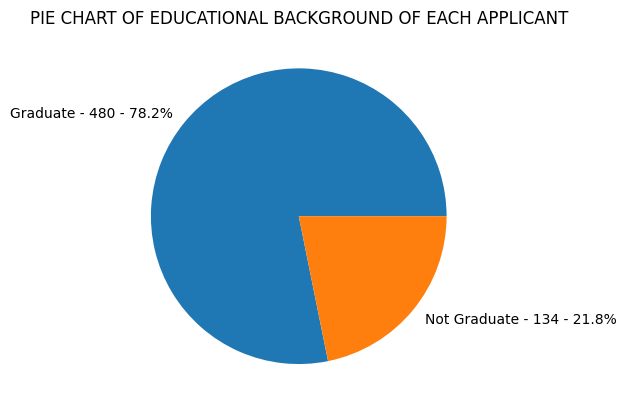

In [14]:
# MEMBUAT GRAFIK NO. 3
Graduate = len(data.loc[data["Education"] == "Graduate"])
Not_Graduate = len(data.loc[data["Education"] == "Not Graduate"])
total = Graduate + Not_Graduate
label = [f"Graduate - {Graduate} - {round(Graduate/total*100, 1)}%", f"Not Graduate - {Not_Graduate} - {round(Not_Graduate/total*100, 1)}%"]
plt.title("PIE CHART OF EDUCATIONAL BACKGROUND OF EACH APPLICANT")
plt.pie([Graduate, Not_Graduate], labels = label)
plt.show()